# Lab 3: Regression  Analysis


## Initial steps

### Import Libraries


In [112]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd  # pandas provides powerful data structures to make data manipulation and analysis easier.
import numpy as np  # numpy is essential for numerical operations on large, multi-dimensional arrays and matrices.
import os  # os module provides a way of using operating system dependent functionality like reading or writing to the filesystem.
import seaborn as sns  # seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive statistical graphics.
import matplotlib as mpl  # matplotlib is a plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments.
import matplotlib.pyplot as plt  # pyplot provides a MATLAB-like plotting framework which is simpler to use.

# Import additional libraries for statistical modeling and machine learning
import statsmodels.api as sm  # statsmodels is used for statistical modeling. This includes regression models, statistical tests, and data exploration.
from sklearn.linear_model import LinearRegression  # LinearRegression is used from scikit-learn to perform linear regression.
from sklearn.model_selection import train_test_split  # train_test_split is used to split the data into training and testing sets.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # These functions are used to compute the performance metrics of a regression model.
from scipy import stats  # stats sub-module of scipy provides a large number of statistical functions and tests.
from scipy.stats import zscore  # zscore is used to calculate the z-score of each value in the dataset, relative to the sample


### Load and Inspect Data

The first step in any data analysis process is to load and inspect the dataset. This essential phase ensures we have a solid understanding of the data's structure, the type of information it contains, and any potential issues that need addressing before deep analysis. This step helps in identifying the right tools and methods for subsequent data manipulation and analysis, ensuring the reliability and accuracy of our findings.

#### Download and Load Dataset

To start our analysis, we first need to access the data. Download the dataset from a URL and load it into a pandas DataFrame.

In [79]:
# Download the dataset from the specified URL and save it as 'dataset1.csv'
!wget -O dataset3.csv https://tsidmlab.fra1.digitaloceanspaces.com/ST87586__kc_house_data_.csv

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset3.csv')

--2024-06-13 18:39:55--  https://tsidmlab.fra1.digitaloceanspaces.com/ST87586__kc_house_data_.csv
Resolving tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)... 5.101.109.44
Connecting to tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)|5.101.109.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1807404 (1.7M) [application/vnd.ms-excel]
Saving to: ‘dataset3.csv’

dataset3.csv        100%[===================>]   1.72M  2.66MB/s    in 0.6s    

2024-06-13 18:39:56 (2.66 MB/s) - ‘dataset3.csv’ saved [1807404/1807404]



#### Initial Data Overview

Let's examine our loaded dataset by reviewing the first few entries of each column.

In [80]:
 # Print the first 5 rows of the DataFrame to get an overview of the data
 print(df.head())

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  
0              0      1955             0           1340        5

The first five rows of the dataset provide an overview of the properties listed for sale, including various characteristics like price, number of bedrooms, bathrooms, and living area in square feet. Here's what this initial look shows:

* Variety in House Features (*bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, yr_built, yr_renovated*): The houses differ greatly in size, age, and price, ranging from more modest homes to larger, pricier options.
* Date of Listing (*date*): The dates show when these properties were put on the market, spanning from October 2014 to February 2015.
* Price Range (*price*): The prices start at 180,000 USD and go up to over 600,000 USD, indicating a varied market.
* Living Space (*sqft_*): The square footage for living areas varies a lot, which points to a mix of smaller and larger homes.
* Additional Features (*waterfront, view*): Details like 'waterfront' and 'view' highlight special features of the properties that might influence their prices.

This initial examination is essential for spotting key factors that could affect the price, which is the main focus for prediction in this dataset.

**Check Dataset Dimensions**

Now, let's determine the size of our dataset.

In [81]:
# Get the dimensions of the DataFrame (number of rows and columns)
print(df.shape)

(21597, 18)


This simple command reveals the structure of the DataFrame, showing that it contains 21,597 rows and 18 columns.

**Data Type Overview**

In [82]:
# Print the data types of each column in the DataFrame to understand the types of data being dealt with
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object


By reviewing the data types of each column, we gain an understanding of the structure of our dataset.Summary of our findings:

* Identifiers and categorical data: Columns like 'id' and 'date' are either identifiers or categorical data, with 'date' requiring potential conversion for time-series analysis.
* Numerical data: Most of the columns, such as 'price', 'bedrooms', 'bathrooms', and 'sqft_living' among others, are numerical. These represent the quantitative aspects of the homes, like size, number of rooms, and price.
* Mixed data types: 'bathrooms' and 'floors' are represented as floating-point numbers, which might indicate fractional values in the dataset.
* Binary data: 'waterfront' and 'view' appear to be binary or categorical, indicating the presence or quality of certain features.

What are the risks and what should we do in the next steps (Data Cleaning and Standardization):

* Date: The 'date' column is currently an object type, which generally means it's treated as a string in pandas. For any time-series analysis or if the date information is crucial for your model, you should convert this column to a datetime type. This conversion would enable easier slicing, filtering, and time-based grouping.

* Bathrooms and Floors: These columns are represented as floating-point numbers (float64). While this might be correct if the data can indeed be fractional (e.g., 2.25 bathrooms might represent two full baths and a half bath), it's important to confirm whether these representations are intentional and correctly reflect the data's nature.

* Categorical Variables Presented as Integers: Columns like 'waterfront', 'view', 'condition', 'grade', and potentially others might be better represented as categorical types or converted to a string format if they represent distinct categories or levels rather than numerical values.


> **Summary:** The dataset has been successfully loaded and initially inspected, ensuring that all data has been correctly and fully imported. This initial overview establishes a solid foundation for the next steps, where we will engage in a thorough exploratory data analysis (EDA). This process will help us to understand the intricacies and relationships within the data, which is crucial for setting up accurate regression models in the subsequent phases of this project.

## Exploratory Data Analysis and Visualization

In the Exploratory Data Analysis and Visualization section, we'll take a closer look at our dataset. We will use various visual tools to discover patterns, identify any unusual data, and explore how different variables relate to each other. Through graphs and charts, we will visually analyze the data, which is a key step before moving on to more complex statistical models and regression analysis. This process helps us prepare the data effectively and guides our next steps in the analysis.

### Descriptive Statistics

##### Understanding Data Characteristics

In [83]:
# Display basic statistics of the dataset to understand the distributions and potential outliers
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549    

Observing these statistics is crucial for identifying the range, average values, and potential outliers in our data. Here’s a brief overview of the insights derived from the dataset’s descriptive statistics:

* ID and Price: The dataset contains various identifiers and property prices ranging from as low as 78,000 USD to as high as 7,700,000  USD, indicating a significant variation in property values.

* Count of Features: There are 21,597 observations in the dataset, covering a broad spectrum of houses with detailed attributes like the number of bedrooms, bathrooms, and living space areas.

* Living Space: Living areas range from 370 to 13,540 square feet, reflecting a diverse set of properties from small apartments to large houses.

* Lot Size: The size of the lots varies widely, indicating the dataset includes a mix of urban and rural properties, with some lots as large as 1,651,359 square feet.

* Age and Renovation: Houses built as early as 1900 and as recent as 2015 are included, with some having undergone renovations, which could impact their market value.

* Quality and Condition: The 'grade' and 'condition' variables suggest varying levels of construction quality and maintenance states, which are critical factors for price determination.

These statistics provide a foundational understanding of the dataset, highlighting the need for further analysis to explore how these variables interact and influence house prices. Such insights are vital for preparing the data for more complex analytical models like regression analysis.

##### Detailed Exploratory Analysis of Key Property Features

To build a strong regression model, it's important to understand all the factors that could influence property prices. Here are the key variables we'll include in our exploratory data analysis:

* Price: This is the sale price of the property, our main variable of interest.

* Bedrooms and Bathrooms: Basic measures of size and the home's capacity.

* Sqft_living: The total living area in square feet, which is a major factor in determining a property’s value.

* Sqft_lot: The total lot area in square feet, which can make a property more attractive, especially in areas where space is at a premium.

* Floors: The number of levels in the home, which can affect its functionality and value.

* Waterfront: Indicates if the property is located on a waterfront, which usually increases its attractiveness and price.

* View: The quality of the surrounding view, which can significantly increase a property’s price.

* Condition: The overall condition of the property, which affects its readiness for sale and potential market value.

* Grade: A measure of construction quality and design, which influences buyer interest and pricing.

* Year Built & Year Renovated: These show the age of the property and the freshness of its facilities, affecting its market value.

Including these variables will give us a detailed view of the dataset and help us find the most significant predictors of property prices. This step ensures that our data is well-prepared for deeper analysis, making our regression model more accurate and reliable.

In [84]:
# Descriptive statistics for selected columns relevant to property features
# This includes the price of the property, number of bedrooms and bathrooms,
# living area in square feet, the quality grade of the house, and its condition.
specific_stats = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'condition']].describe()
print(specific_stats)

              price      bedrooms     bathrooms   sqft_living         grade  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   5.402966e+05      3.373200      2.115826   2080.321850      7.657915   
std    3.673681e+05      0.926299      0.768984    918.106125      1.173200   
min    7.800000e+04      1.000000      0.500000    370.000000      3.000000   
25%    3.220000e+05      3.000000      1.750000   1430.000000      7.000000   
50%    4.500000e+05      3.000000      2.250000   1910.000000      7.000000   
75%    6.450000e+05      4.000000      2.500000   2550.000000      8.000000   
max    7.700000e+06     33.000000      8.000000  13540.000000     13.000000   

          condition  
count  21597.000000  
mean       3.409825  
std        0.650546  
min        1.000000  
25%        3.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  


The statistical summary for selected property features offers valuable insights into our real estate dataset. We analyzed features including:

> price, bedrooms, bathrooms, sqft_living , grade  and condition.

Here’s what we found:

* Price: Property prices range widely from 78,000 USD to 7,700,000 USD, with an average of approximately 540,296 USD. This variation shows a diverse property market that includes both affordable homes and high-end estates. The high standard deviation of 367,368 USD indicates a wide variation in property prices.

* Bedrooms: The properties vary greatly in size with bedrooms ranging from 1 to 33, averaging about 3.37 bedrooms per home. The presence of properties with a large number of bedrooms suggests the inclusion of some unusually large homes.

* Bathrooms: Similarly, the number of bathrooms ranges from 0.5 to 8, with an average of about 2.12, indicating a mix of different home sizes.

* Living Space (sqft_living): Living space also varies significantly, from 370 to 13,540 square feet, with the average living area being around 2,080 square feet. This suggests a mix of compact apartments and large residential homes.

* Grade: The grade of properties, reflecting construction quality and design, varies from 3 to 13, with most homes around the 7 or 8 mark, indicating good quality construction.

* Condition: The condition score ranges from 1 to 5, with an average near 3.4, showing that most homes are in fair to good condition.

> This analysis highlights the diversity in the housing options within the dataset, reflecting various preferences and budgets. Understanding these distributions is essential as they likely influence the price and appeal of properties. Given the variability and richness of the dataset, it appears suitable for regression analysis, which will help us understand the factors that most significantly impact property prices.

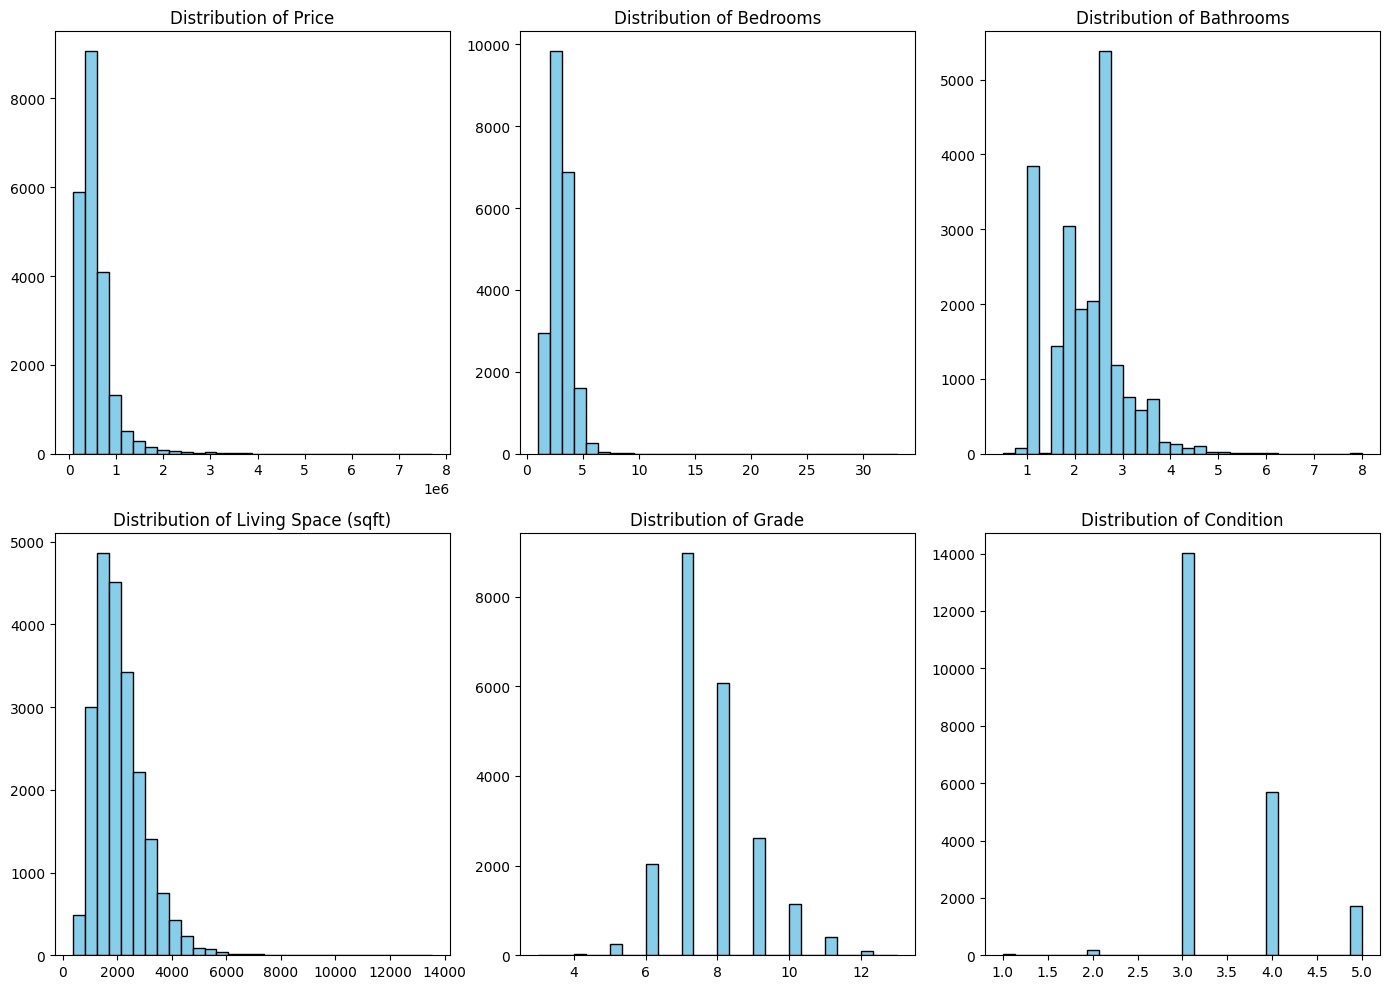

In [85]:
# Plot histograms for key features
plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')

plt.subplot(2, 3, 2)
plt.hist(df['bedrooms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bedrooms')

plt.subplot(2, 3, 3)
plt.hist(df['bathrooms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bathrooms')

plt.subplot(2, 3, 4)
plt.hist(df['sqft_living'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Living Space (sqft)')

plt.subplot(2, 3, 5)
plt.hist(df['grade'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Grade')

plt.subplot(2, 3, 6)
plt.hist(df['condition'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Condition')

plt.tight_layout()
plt.show()

The histograms show the distribution of different property features in our dataset:

1. **Price Distribution**:
   - Most properties are priced below 1,000,000 USD, with many between 300,000 and 500,000 USD. Few properties exceed 2,000,000 USD, indicating that high-priced homes are rare.

2. **Bedrooms Distribution**:
   - Most homes have 2 to 4 bedrooms, with 3 bedrooms being the most common. Homes with more than 6 bedrooms are very rare, showing a focus on medium-sized family homes.

3. **Bathrooms Distribution**:
   - The number of bathrooms mostly ranges from 1 to 3. Homes with more than 4 bathrooms are uncommon, likely representing larger, more luxurious properties.

4. **Square Footage of Living Space (sqft_living)**:
   - Most living areas range from 1,000 to 3,000 square feet. Homes with more than 5,000 square feet are rare, suggesting the dataset mainly includes standard-sized family homes.

5. **Grade Distribution**:
   - The quality grade shows most homes have a grade between 6 and 8, indicating good construction quality. Very few homes have low grades (3-5) or high grades (11-13).

6. **Condition Distribution**:
   - Most homes are rated as 3 for condition, meaning moderate maintenance. Homes rated 4 or 5, indicating higher maintenance or excellent condition, are less common.

> These histograms help us understand the main features of the housing market in this dataset. Properties mainly fall into middle-range categories in terms of size, quality, and amenities. This data is essential for analyzing market trends, pricing strategies, and potential buyer preferences. The next steps should focus on examining the relationships between these features and property prices, identifying outliers, and developing models to predict property values.

### Data Cleaning and preparation

Data cleaning is a crucial step in the data analysis process. It involves identifying and correcting (or removing) errors and inconsistencies in the dataset to improve the quality and reliability of the analysis. In this section, we will address any missing values, identify and handle outliers, and ensure that all data types are correctly assigned. This process ensures that our dataset is clean and ready for further analysis and modeling.

#### Check for Missing Values

In [86]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64


The results from the missing values check show that our dataset is very clean, with no missing values in any columns. Here’s a summary of the findings:

- **ID, Date, and Price:** These important columns have no missing values. The 'id' column uniquely identifies each property, 'date' records the listing date, and 'price' represents the property price, which is our main variable to predict.
- **Bedrooms and Bathrooms:** These columns, which show the number of bedrooms and bathrooms in each property, are complete with no missing data.
- **Square Footage Columns:** Columns like 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', and 'sqft_lot15' have no missing values, giving us complete information about the size and space of each property.
- **Floors, Waterfront, View, Condition, Grade:** These categorical and ordinal features are fully populated, providing valuable details about the characteristics and quality of each property.
- **Year Built and Year Renovated:** These columns, which indicate the age and renovation status of the properties, also have no missing values.

> Since there are no missing values, we can move on to the next steps without worrying about handling missing data. This ensures a smoother and quicker workflow.

#### Identify outliers

To get a general overview of outliers in each column, we will use a visual method with box plots.

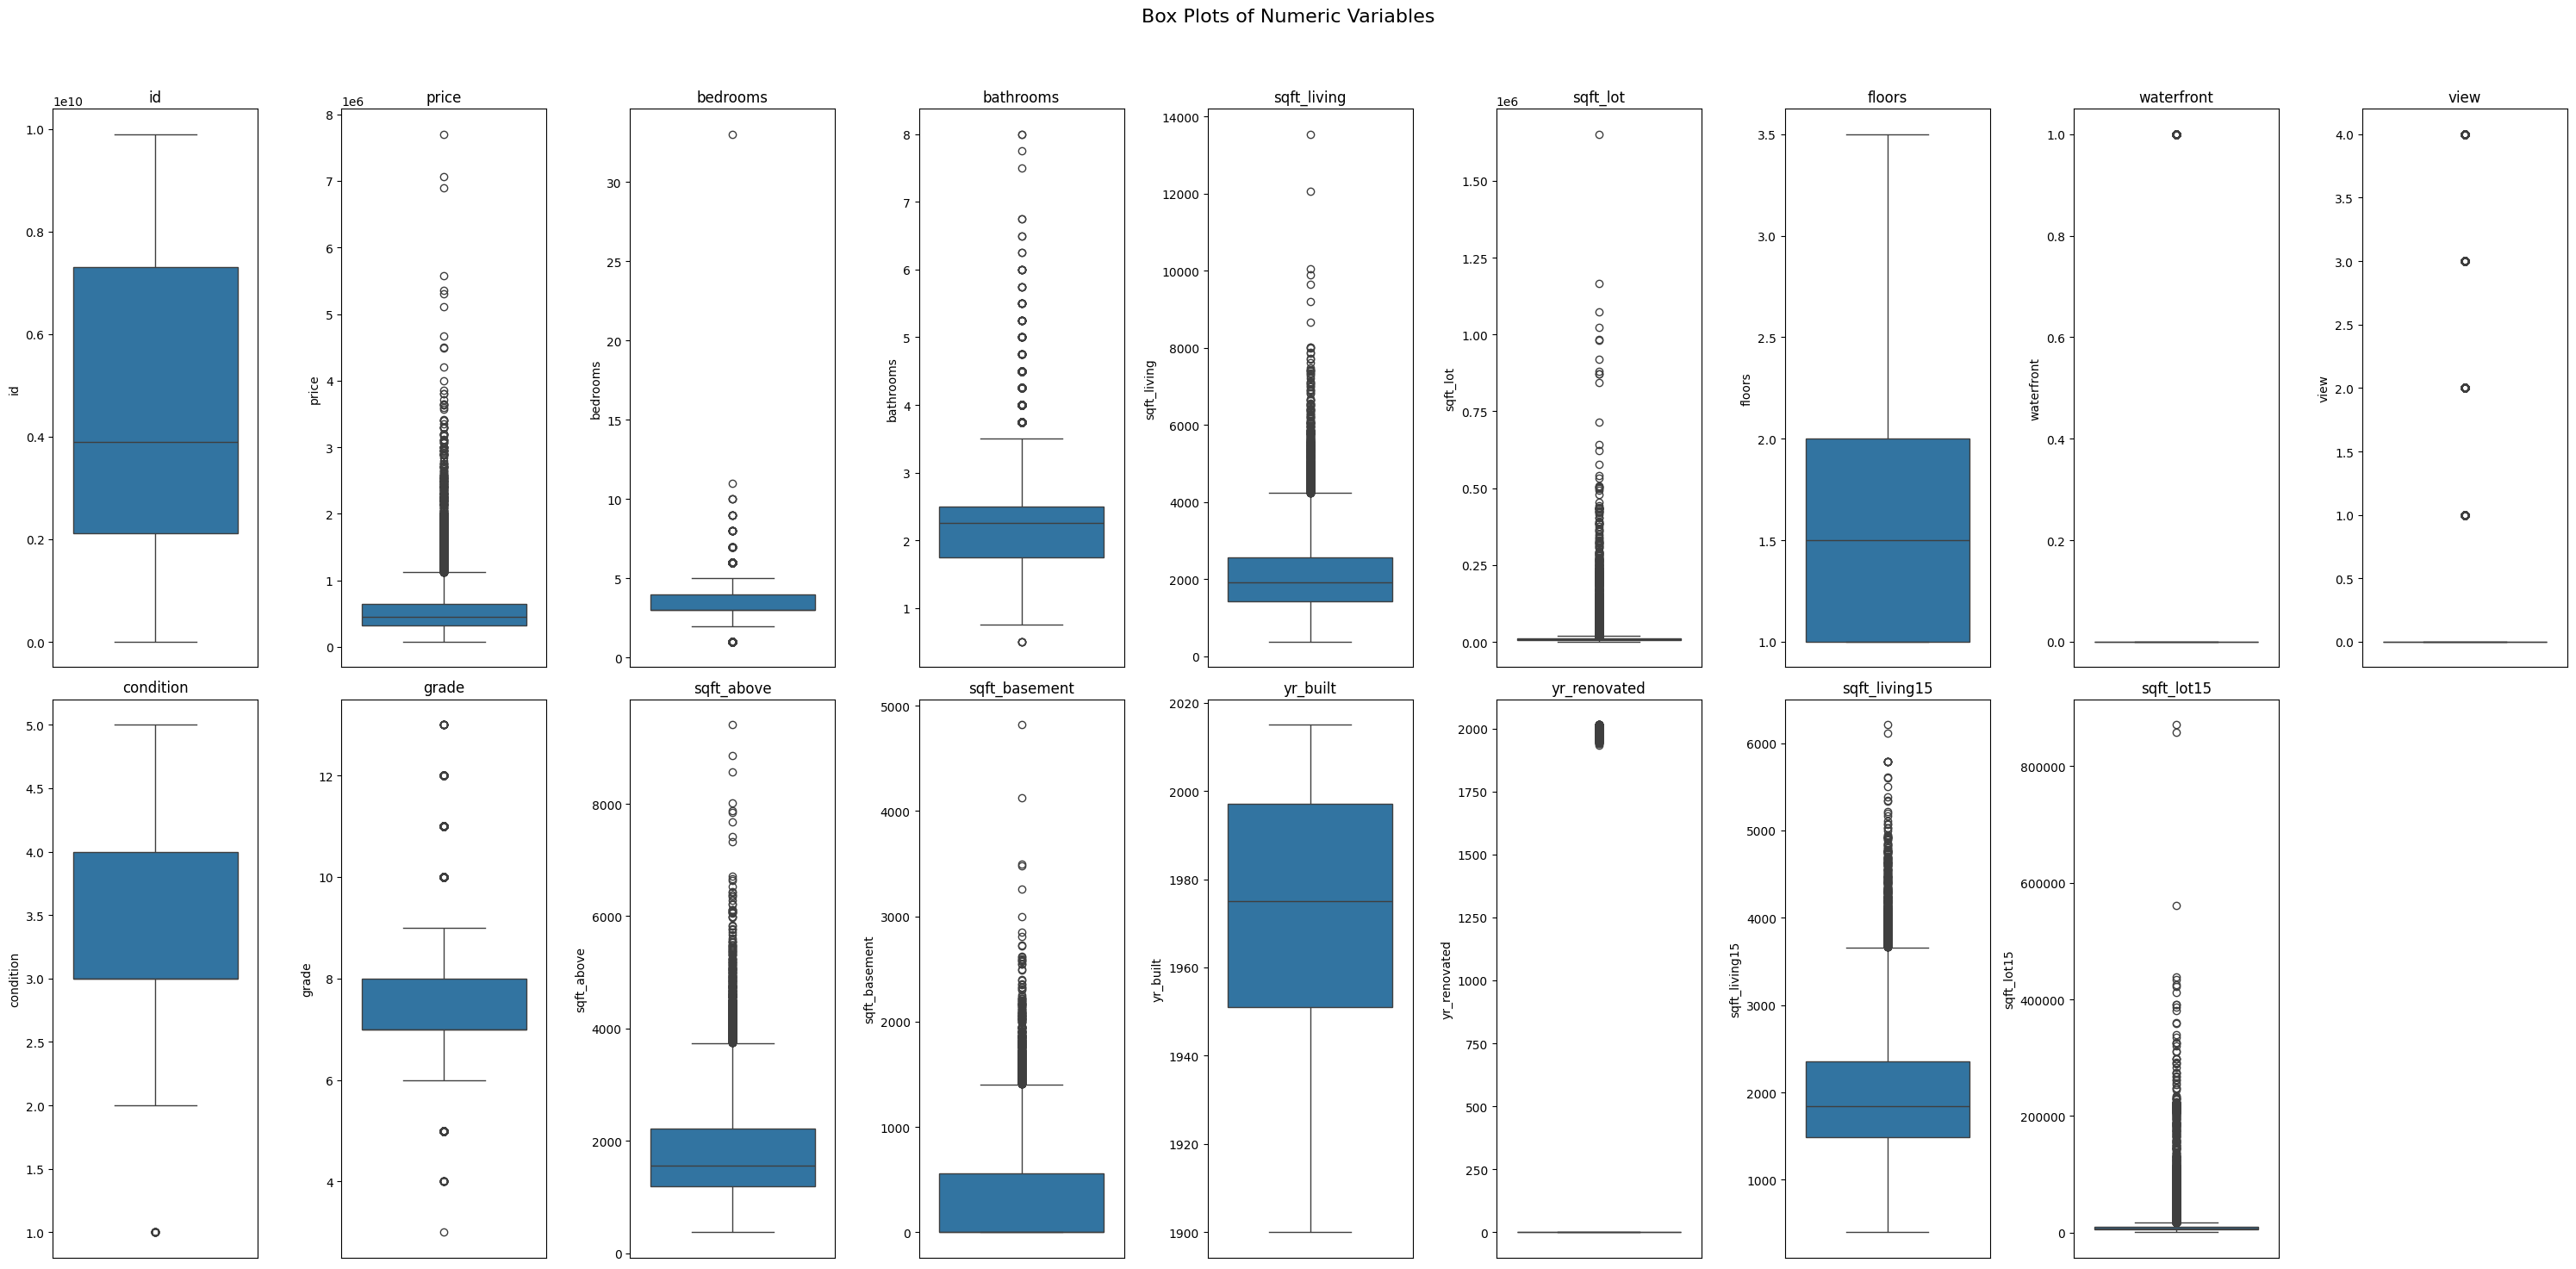

In [87]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Create a figure with subplots for each numeric column
fig, axes = plt.subplots(nrows=2, ncols=9, figsize=(30, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate a box plot for each numeric column
for ax, column in zip(axes, numeric_cols.columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(column)
    ax.set_xticks([])  # Remove x-ticks for better visualization

# Hide any unused subplots
for i in range(len(numeric_cols.columns), len(axes)):
    fig.delaxes(axes[i])

# Add a title to the figure
fig.suptitle("Box Plots of Numeric Variables", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Examine each column to determine which ones have a significant number of outliers that may impact our future regression analysis.
    
* Price:

The box plot for price shows several outliers in the higher range, with prices going far above the upper whisker. This means that while most houses are in a more affordable price range, there are some very expensive properties.

* Bedrooms:

The number of bedrooms has a few outliers with a very high count. Most properties have between 2 to 5 bedrooms, with a small number having more than 10 bedrooms, which is quite unusual.

* Bathrooms:
        
The number of bathrooms also has high-end outliers, with most properties having between 1 to 3 bathrooms. Some properties have up to 8 bathrooms, indicating luxury homes.


* Sqft Living:

The living area in square feet shows a wide range, with several high-end outliers. Most properties have living spaces between 1,000 to 3,000 square feet, but there are some very large homes with living spaces over 10,000 square feet.

* Grade:

The grade of the house, reflecting its quality, shows most houses graded between 6 to 8. However, there are outliers with grades up to 13, indicating high-quality or luxury homes.

* Condition:

Most houses are in conditions rated between 3 to 4, indicating average to good condition. There are fewer outliers in this variable, with some houses in excellent condition (grade 5) and a few in poor condition (grade 1).

* Sqft Lot:
        
The lot size shows many outliers, with most properties having a lot size between 5,000 to 10,000 square feet. Some properties have extremely large lots, extending to hundreds of thousands of square feet, indicating possibly rural or estate properties.

* Floors:
        
The number of floors generally ranges between 1 to 2, with a few properties having up to 3.5 floors, indicating multi-story homes.

* Waterfront:
        
The waterfront variable is mostly 0 (no waterfront), with a few properties having waterfront views. This binary variable does not have traditional outliers but shows a few properties with this premium feature.

* View:

The view variable shows most properties do not have a significant view rating (0), but some properties have excellent views (up to 4), indicating premium locations.

* Sqft Above:
        
The square footage above ground shows a similar pattern to total square footage, with most properties between 1,000 to 3,000 square feet and some large properties extending beyond 5,000 square feet.

* Sqft Basement:

Basement square footage shows many properties with no basement, but some have extensive basements up to 4,820 square feet, indicating additional living or storage space.

* Yr Built:
        
The year built variable shows most properties constructed between 1950 and 2000. There are no significant outliers, but the data covers a wide range of construction years, from the early 1900s to recent years.

* Yr Renovated:

Most properties have not been renovated (0), but some properties have recent renovations. There are outliers indicating significant renovations done in recent years.

* Sqft Living15:

The square footage of living space in the nearest 15 houses shows a similar pattern to the primary living space, with most properties between 1,000 to 3,000 square feet and some outliers indicating larger neighboring properties.

* Sqft Lot15:
        
The lot size of the nearest 15 properties shows wide variation with many outliers, similar to the primary lot size variable.


These observations suggest multiple outliers across different variables, especially in property size, price, and luxury features. These outliers should be carefully considered during the data cleaning process to ensure a robust and reliable regression analysis.

> Variables that should be cleaned from outliers:
* price
* bedrooms
* bathrooms
* sqft_living
* grade
* sqft_lot
* sqft_basement
* sqft_living15
* sqft_lot15

#### Handle Outliers Using IQR Method

In this step, we will handle the outliers identified in our dataset using the Interquartile Range (IQR) method. We will focus on the variables that have a significant number of outliers, which were identified in the previous step. Handling these outliers is crucial to ensure the accuracy and reliability of our regression analysis.

Variables with a significant number of outliers:

* price
* bedrooms
* bathrooms
* sqft_living
* grade
* sqft_lot
* sqft_basement
* sqft_living15
* sqft_lot15


The IQR method is a popular technique for detecting outliers. It involves calculating the first quartile (Q1) and the third quartile (Q3) of the data, and then determining the IQR as the difference between these two values. Any data point that lies below Q1 - 1.5IQR or above Q3 + 1.5IQR is considered an outlier.

In [88]:
# List of variables to check for outliers
variables_with_outliers = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade',
    'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15'
]

# Calculate IQR for each variable and filter out outliers
df_cleaned = df.copy()
for var in variables_with_outliers:
    Q1 = df_cleaned[var].quantile(0.25)
    Q3 = df_cleaned[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_cleaned = df_cleaned[(df_cleaned[var] >= lower_bound) & (df_cleaned[var] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")

Number of rows before removing outliers: 21597
Number of rows after removing outliers: 15961


The significant reduction in the number of rows indicates that a substantial number of outliers were present and have been removed.

> To ensure that the outliers have been effectively handled, we will replot the boxplots for the cleaned dataset.

**Replot Boxplots for Cleaned Dataset**

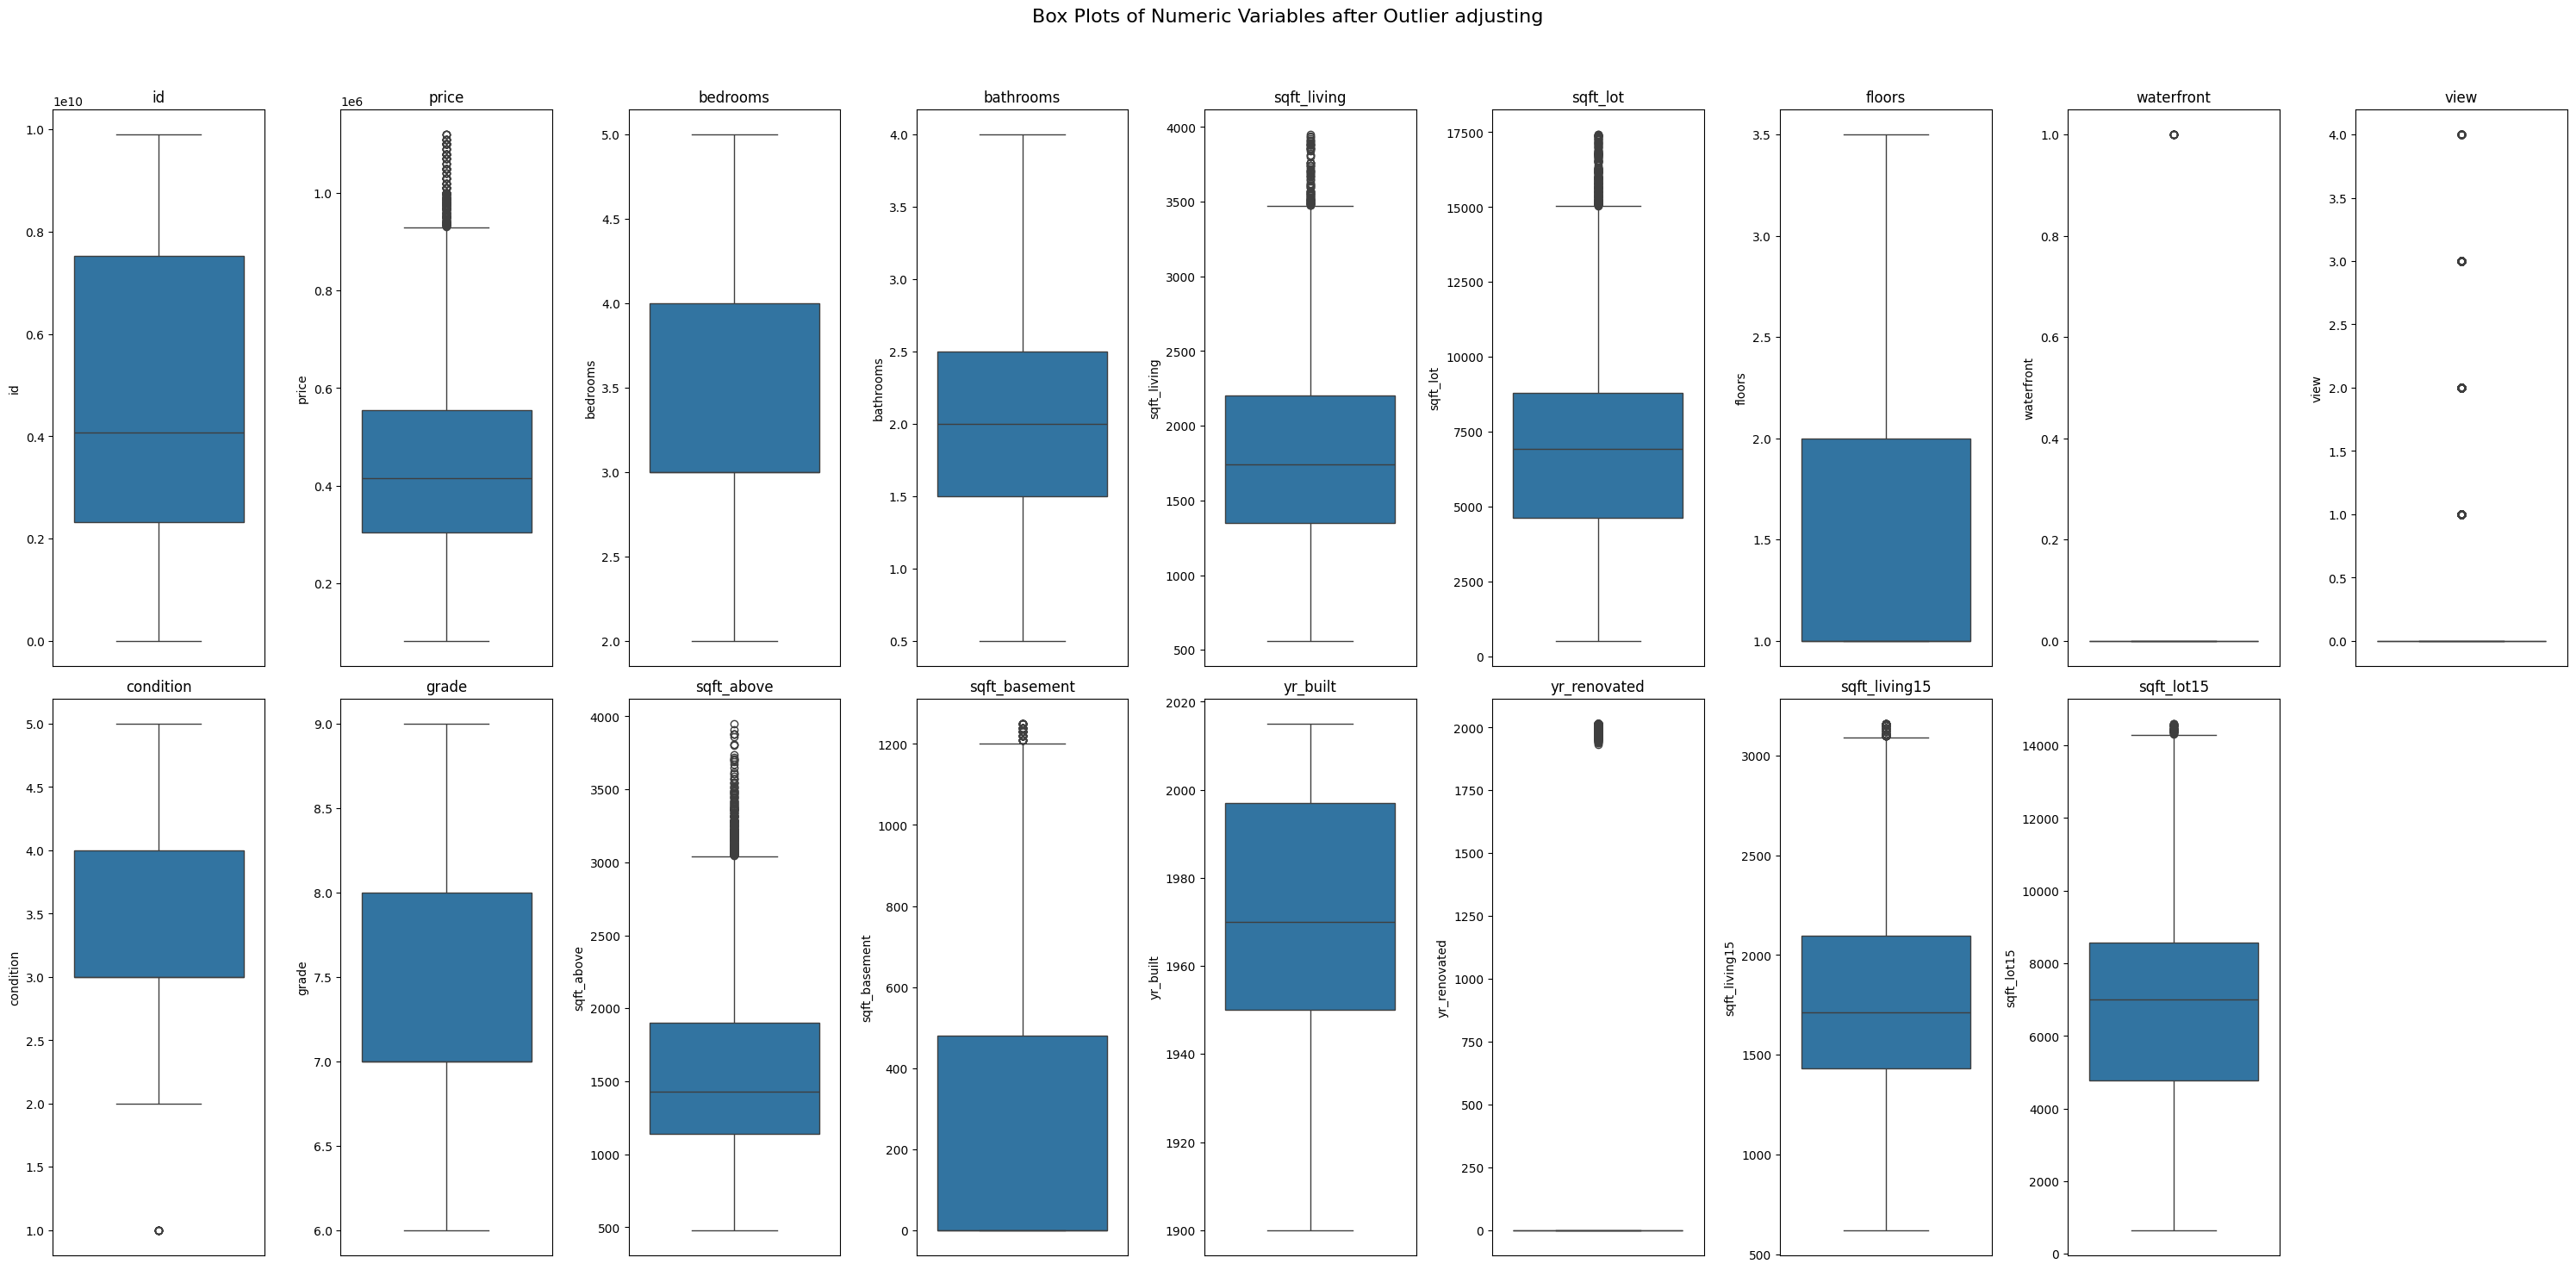

In [89]:
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number])

# Create a figure with subplots for each numeric column
fig, axes = plt.subplots(nrows=2, ncols=9, figsize=(30, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate a box plot for each numeric column
for ax, column in zip(axes, numeric_cols.columns):
    sns.boxplot(y=df_cleaned[column], ax=ax)
    ax.set_title(column)
    ax.set_xticks([])  # Remove x-ticks for better visualization

# Hide any unused subplots
for i in range(len(numeric_cols.columns), len(axes)):
    fig.delaxes(axes[i])

# Add a title to the figure
fig.suptitle("Box Plots of Numeric Variables after Outlier adjusting", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


After removing outliers using the IQR method, we looked at the box plots for the numeric variables again to compare them with the previous box plots. Here are the observations:

* Price: Extreme outliers have been removed, and the distribution is more condensed, though some mild outliers remain.
* Bedrooms: The distribution is tighter, with fewer extreme values compared to the original plot.
* Bathrooms: Similar to bedrooms, the distribution shows fewer extreme outliers, indicating a more even spread.
* Sqft Living: Significant reduction in extreme values, leading to a more balanced distribution.
* Grade: Outliers have been largely removed, resulting in a cleaner plot.
* Condition: The distribution remains similar as it did not have many outliers to begin with.
* Sqft Lot: The spread of values is much more compact, showing the effectiveness of outlier removal.
* Sqft Basement: Outliers have been successfully removed, leading to a more even distribution.
* Sqft Living15: The range has been significantly reduced, showing a more condensed and even spread.
* Sqft Lot15: Similar to Sqft Living15, the distribution has been cleaned up significantly.

> Overall, the new box plots show that the data is now more consistent and less affected by extreme values. This improved consistency will provide a more reliable foundation for the next step, which is regression analysis.

#### Adjust Data Types and columns

Before proceeding with correlation analysis and regression modeling, it is crucial to ensure that all columns have appropriate data types. This step helps avoid potential issues during the analysis and modeling phases. For instance, date columns should be in datetime format, and categorical variables should be converted to the appropriate type.

**Remove ID Column**

We should remove the 'id' column from the cleaned dataset as it does not contribute to the predictive modeling. The 'id' column is just an identifier and does not have any meaningful correlation with the target variable 'price' and others.

In [90]:
# Remove the 'id' column from the cleaned dataset
df_cleaned.drop(['id'], axis=1, inplace=True)

**Adjust Data Types**

The 'date' column has been converted to datetime format. This conversion is essential for any time-series analysis or if we wish to extract features like the year, month, or day of the week.

Columns like 'waterfront', 'view', 'condition', and 'grade' have been converted to categorical data types. This conversion ensures that these variables are treated appropriately during analysis and modeling.

In [91]:
# Convert date column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Convert categorical variables to category type
df_cleaned['waterfront'] = df_cleaned['waterfront'].astype('category')
df_cleaned['view'] = df_cleaned['view'].astype('category')
df_cleaned['condition'] = df_cleaned['condition'].astype('category')
df_cleaned['grade'] = df_cleaned['grade'].astype('category')

# Verify the changes
print(df_cleaned.dtypes)


date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
sqft_living15             int64
sqft_lot15                int64
dtype: object


The data type adjustments have been successfully made, ensuring that each column is in the correct format for analysis and modeling. Here are the details of the changes:

* ID Column:
Removed

* Date Column:
Converted to datetime64[ns].
This conversion is essential for any time-series analysis or for extracting features like the year, month, or day of the week.

* Price:
Remains as float64.
This is the target variable for regression analysis, and keeping it as a float allows for precise numerical calculations.

* Bedrooms, Bathrooms, Sqft Living, Sqft Lot, Floors, Sqft Above, Sqft Basement, Yr Built, Yr Renovated, Sqft Living15, and Sqft Lot15:
These columns remain as int64 or float64 as appropriate.
These numeric formats are suitable for continuous numerical analysis.

* Categorical Variables:
Waterfront, View, Condition, and Grade:
Converted to category data type.


This conversion ensures these variables are treated as categorical data during analysis and modeling, which is appropriate for non-numerical data that represent categories or groups.

#### Transforming and Dropping Date Column

Before diving into regression analysis, we need to ensure our data is suitable for such methods, which typically require purely numerical input. The 'date' column in our dataset is formatted as a datetime object, which isn't directly compatible with regression models. To utilize the valuable temporal information it holds, we'll convert this column into three separate numerical columns: 'year', 'month', and 'day'.

This transformation allows the model to potentially identify any trends or patterns linked to specific times, which could be crucial for predicting our target variable. Once we've extracted these numerical values, we'll remove the original 'date' column to tidy up our dataset, making it ready for effective analysis.

In [92]:
# Assuming 'date' is the column in datetime format
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day

# Now drop the original 'date' column
df_cleaned.drop('date', axis=1, inplace=True)

# Check transformation results
print(df_cleaned.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  221900.0         3       1.00         1180      5650     1.0          0   
1  538000.0         3       2.25         2570      7242     2.0          0   
2  180000.0         2       1.00          770     10000     1.0          0   
3  604000.0         4       3.00         1960      5000     1.0          0   
4  510000.0         3       2.00         1680      8080     1.0          0   

  view condition grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0    0         3     7        1180              0      1955             0   
1    0         3     7        2170            400      1951          1991   
2    0         3     6         770              0      1933             0   
3    0         5     7        1050            910      1965             0   
4    0         3     8        1680              0      1987             0   

   sqft_living15  sqft_lot15  year  month  day  
0           1340   

The 'date' column has been successfully split into 'year', 'month', and 'day' columns, enhancing our dataset's suitability for regression analysis by allowing us to explore potential seasonal trends or yearly patterns in property prices. Removing the original 'date' column simplifies the data structure, making it more manageable for modeling. The updated DataFrame, displayed below, incorporates these changes, effectively readying it for further analysis.

#### Convert Categorical Variables into Dummy Variables

In regression analysis, it's important to change categorical data into a numerical format that the model can understand. This involves converting categorical variables into dummy or indicator variables. Dummy variables are binary (0 or 1) and show the presence or absence of a specific category. By creating these dummy variables, we ensure that our regression model can use the categorical data effectively. In this step, we will convert the categorical variables in our dataset into dummy variables to prepare the data for regression analysis.

In [93]:
# Convert categorical variables into dummy/indicator variables
df_dummies = pd.get_dummies(df_cleaned, drop_first=True)

# Display the first few rows to verify the conversion
print(df_dummies.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0  221900.0         3       1.00         1180      5650     1.0        1180   
1  538000.0         3       2.25         2570      7242     2.0        2170   
2  180000.0         2       1.00          770     10000     1.0         770   
3  604000.0         4       3.00         1960      5000     1.0        1050   
4  510000.0         3       2.00         1680      8080     1.0        1680   

   sqft_basement  yr_built  yr_renovated  ...  view_2  view_3  view_4  \
0              0      1955             0  ...   False   False   False   
1            400      1951          1991  ...   False   False   False   
2              0      1933             0  ...   False   False   False   
3            910      1965             0  ...   False   False   False   
4              0      1987             0  ...   False   False   False   

   condition_2  condition_3  condition_4  condition_5  grade_7  grade_8  \
0        Fa

Done.

> With the data cleaned and outliers handled, and the unnecessary 'id' column removed, we can proceed to correlation analysis and regression modeling to further understand the relationships between variables and predict house prices accurately.

### Correlation Analysis

In this subsection, we will perform a correlation analysis to examine the relationships between different variables in our dataset. Understanding these correlations is crucial for identifying significant predictors for our regression model and detecting any multicollinearity issues.

#### Correlation Matrix

In [94]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Display the correlation matrix
print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.220146   0.340055     0.504289 -0.099865  0.223188   
bedrooms       0.220146  1.000000   0.444935     0.604953  0.206262  0.133866   
bathrooms      0.340055  0.444935   1.000000     0.670271 -0.084447  0.517722   
sqft_living    0.504289  0.604953   0.670271     1.000000  0.165235  0.323116   
sqft_lot      -0.099865  0.206262  -0.084447     0.165235  1.000000 -0.417319   
floors         0.223188  0.133866   0.517722     0.323116 -0.417319  1.000000   
waterfront     0.058978 -0.000677   0.007828     0.017541  0.029224  0.003587   
view           0.217553  0.023790   0.065638     0.126317  0.026782 -0.007101   
condition      0.084103  0.026385  -0.142816    -0.058269  0.144356 -0.278676   
grade          0.518804  0.277520   0.572383     0.609737 -0.040514  0.465192   
sqft_above     0.380137  0.477663   0.586256     0.825977  0.124371  0.519991   
sqft_basement  0.231314  0.2

The correlation matrix for our dataset reveals several important relationships between the variables:

1.Date:
* Minimal correlation with other variables, which is expected as the sale date does not have a direct linear relationship with other house features.

2.Price:
* Positively correlated with:
    * `sqft_living` (0.50): Larger living spaces tend to have higher prices.
    * `grade` (0.52): Higher quality grades are associated with higher prices.
    * `sqft_above` (0.38): More above-ground square footage correlates with higher prices.
* Negatively correlated with:
    * `sqft_lot` (-0.10): Larger lot sizes do not necessarily mean higher prices, possibly due to property location variability.

3.Bedrooms:
* Positively correlated with:
    * `sqft_living` (0.60): More bedrooms generally mean larger living spaces.
    * `bathrooms` (0.44): Houses with more bedrooms tend to have more bathrooms.

4.Bathrooms:
* Positively correlated with:
    * `sqft_living` (0.67): More bathrooms are typically found in houses with larger living areas.
    * `grade` (0.57): Higher quality houses tend to have more bathrooms.

5.Sqft Living:
* Positively correlated with:
    * `grade` (0.61): Higher quality houses often have more living space.
    *`sqft_above` (0.83): More above-ground living space contributes significantly to total living space.

6.Grade:

* Strongly correlated with many variables such as `sqft_living`, `bathrooms`, and `sqft_above`, indicating that higher-grade houses generally have better and larger features.

7.Floors:
* Positively correlated with `bathrooms` (0.52) and `sqft_living` (0.32), suggesting multi-story houses have more living space and facilities.

* Negatively correlated with `sqft_lot` (-0.42), indicating that multi-story houses often have smaller lots.

8.Waterfront and View:
* Slightly positively correlated with price, indicating properties with waterfront or good views tend to be priced higher.

9 Condition:
* Generally weak correlations with other variables, but some negative correlation with `grade` (-0.18), suggesting that higher-grade houses might not always be in better condition.

**Conclusions:**
> * Based on the correlation matrix, we should handle multicollinearity among highly correlated predictors before running regression analysis.
* Focus on `sqft_living`, `grade, bathrooms`, and `sqft_above` as they have significant positive correlations with price.
* Consider transforming or combining some variables (like `sqft_living` and `sqft_above`) to handle multicollinearity.

Next, we will build a heatmap to visualize the correlation matrix. This will help us better understand the strength and direction of relationships between variables, making it easier to identify highly correlated pairs that might affect our regression model.

#### Correlation Heatmap

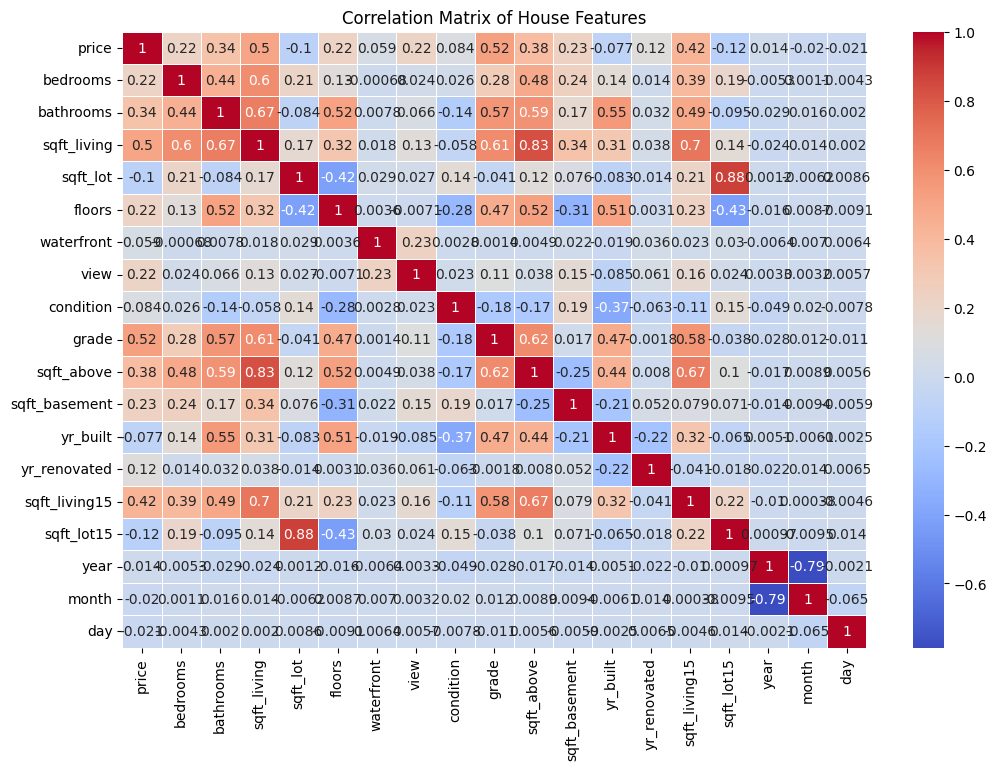

In [95]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of House Features')
plt.show()

The correlation heatmap provides a visual representation of the relationships between different features in our dataset. Here's a detailed analysis of the insights we can gain from this heatmap:

1.Price:

* Strong positive correlations:
    * `sqft_living` (0.50): Larger living areas tend to have higher prices.
    * `grade` (0.52): Higher quality grades are associated with higher prices.
    * `bathrooms` (0.34): More bathrooms correlate with higher prices.
    * `sqft_above` (0.38): More above-ground square footage contributes to higher prices.
    * `sqft_living15` (0.42): Larger living areas in the neighborhood positively influence house prices.

* Negative correlations:
    * `sqft_lot` (-0.10): Larger lot sizes do not necessarily increase property prices.

2.Bedrooms:
* Positive correlations:
    * `sqft_living` (0.60): Houses with more bedrooms generally have larger living areas.
    * `bathrooms` (0.44): More bedrooms often mean more bathrooms.
    * `sqft_living15` (0.39): More bedrooms in houses correlate with larger living areas in the neighborhood.

3.Bathrooms:
* Strong positive correlations:
    * `sqft_living` (0.67): Houses with more bathrooms tend to have larger living spaces.
    * `grade` (0.57): Higher quality houses generally have more bathrooms.
    * `sqft_above` (0.59): More above-ground space correlates with more bathrooms.
    * `floors` (0.52): Multi-story houses often have more bathrooms.

4.Sqft Living:
* Strong positive correlations:
    * `sqft_above` (0.83): More above-ground space significantly contributes to the total living area.
    * `grade` (0.61): Higher-grade houses have more living space.
    * `bathrooms` (0.67): Larger living areas are associated with more bathrooms.
    * `sqft_living15` (0.70): Houses with larger living areas are often in neighborhoods with larger living spaces.

5.Grade:
* Strong positive correlations:
    * sqft_living (0.61): Higher quality grades are associated with larger living areas.
    * bathrooms (0.57): Higher-grade houses generally have more bathrooms.
    * sqft_above (0.62): Higher-grade houses often have more above-ground living space.

6.Sqft Lot:
* Strong positive correlation:
    * sqft_lot15 (0.88): Larger lot sizes are often found in neighborhoods with larger lots.

* Negative correlation:

    * `floors` (-0.42): Multi-story houses tend to have smaller lot sizes.

7.Condition:
* Generally weak correlations with other variables, but some positive correlation with `sqft_lot` (0.14) indicating larger lots may have better-conditioned houses.


#### Conclusion on Correlation Analysis

In this analysis, we explored the relationships between various features in our housing dataset using both a correlation matrix and a heatmap. The correlation matrix provided numerical insights into how each variable relates to the others, revealing strong positive correlations between key features such as price, sqft_living, grade, and bathrooms. These relationships suggest which variables are most likely to influence house prices.

The heatmap offered a visual representation of these correlations, making it easier to identify strong relationships and potential issues with multicollinearity. The visual approach confirmed the significant positive correlations highlighted in the matrix and indicated areas where predictor variables may be interrelated.

By combining these two methods, we gained a comprehensive understanding of the data structure and relationships. This will guide the next steps in our analysis, ensuring we focus on the most impactful features and address any potential issues, such as multicollinearity, before building our regression model. Moving forward, we will use these insights to refine our data and improve the robustness of our predictive models.

### Scatter Plots and Preliminary Analysis

In this section, we will create scatter plots to visualize the relationships between the dependent variable (price) and the continuous independent variables. This visual inspection helps in understanding the nature of the relationships (linear, nonlinear, etc.) and identifying any potential patterns or anomalies.

#### Choosing Variables for Analysis

In this section, we identify and select the continuous independent variables in our dataset. These variables are crucial for our regression analysis as they help in understanding the relationship between the dependent variable (price) and other numerical features of the properties. By examining these continuous variables, we can create scatter plots to visualize and analyze their influence on the property prices. This step sets the foundation for more detailed analysis and modeling in subsequent sections.

The chosen continuous variables represent key attributes of properties that are expected to have a significant impact on their market value. These variables include measurements of size (e.g., square footage of living area and lot), quality (e.g., number of bedrooms and bathrooms), and age (e.g., year built and year renovated). By including these variables, we aim to capture a comprehensive view of the factors that influence property prices.

Identified Continuous Independent Variables:

* sqft_living: Total living area in square feet,
directly related to the size of the property.
* bedrooms: Number of bedrooms, indicating the accommodation capacity of the property.
* bathrooms: Number of bathrooms, another indicator of the property's capacity and convenience.
* sqft_lot: Total lot size in square feet, which can affect the property's value.
* floors: Number of floors, related to the property’s layout and possibly its market value.
* sqft_above: Square footage of the house excluding the basement, reflecting the main living area.
* sqft_basement: Square footage of the basement, contributing to the overall living space.
* yr_built: Year the house was built, indicating the property’s age and possibly its condition.
* yr_renovated: Year the house was renovated, which might enhance the property's value.
* sqft_living15: Living area in square feet of the nearest 15 neighbors, reflecting the neighborhood’s typical property size.
* sqft_lot15: Lot size in square feet of the nearest 15 neighbors, indicating the neighborhood’s typical lot size.

By analyzing these variables, we can better understand how different aspects of a property contribute to its overall price and use this information to build a predictive model.

#### Visual Analysis Based on Scatter Plots

Scatter plots are an effective way to visualize the relationship between the dependent variable, 'price,' and various continuous independent variables. By examining these scatter plots, we can identify patterns, trends, and potential correlations between these variables. This step is crucial for understanding how each feature might influence the price and for identifying any anomalies or outliers in the data.

Let's create scatter plots for each of the continuous independent variables to visually inspect their relationship with the house prices.

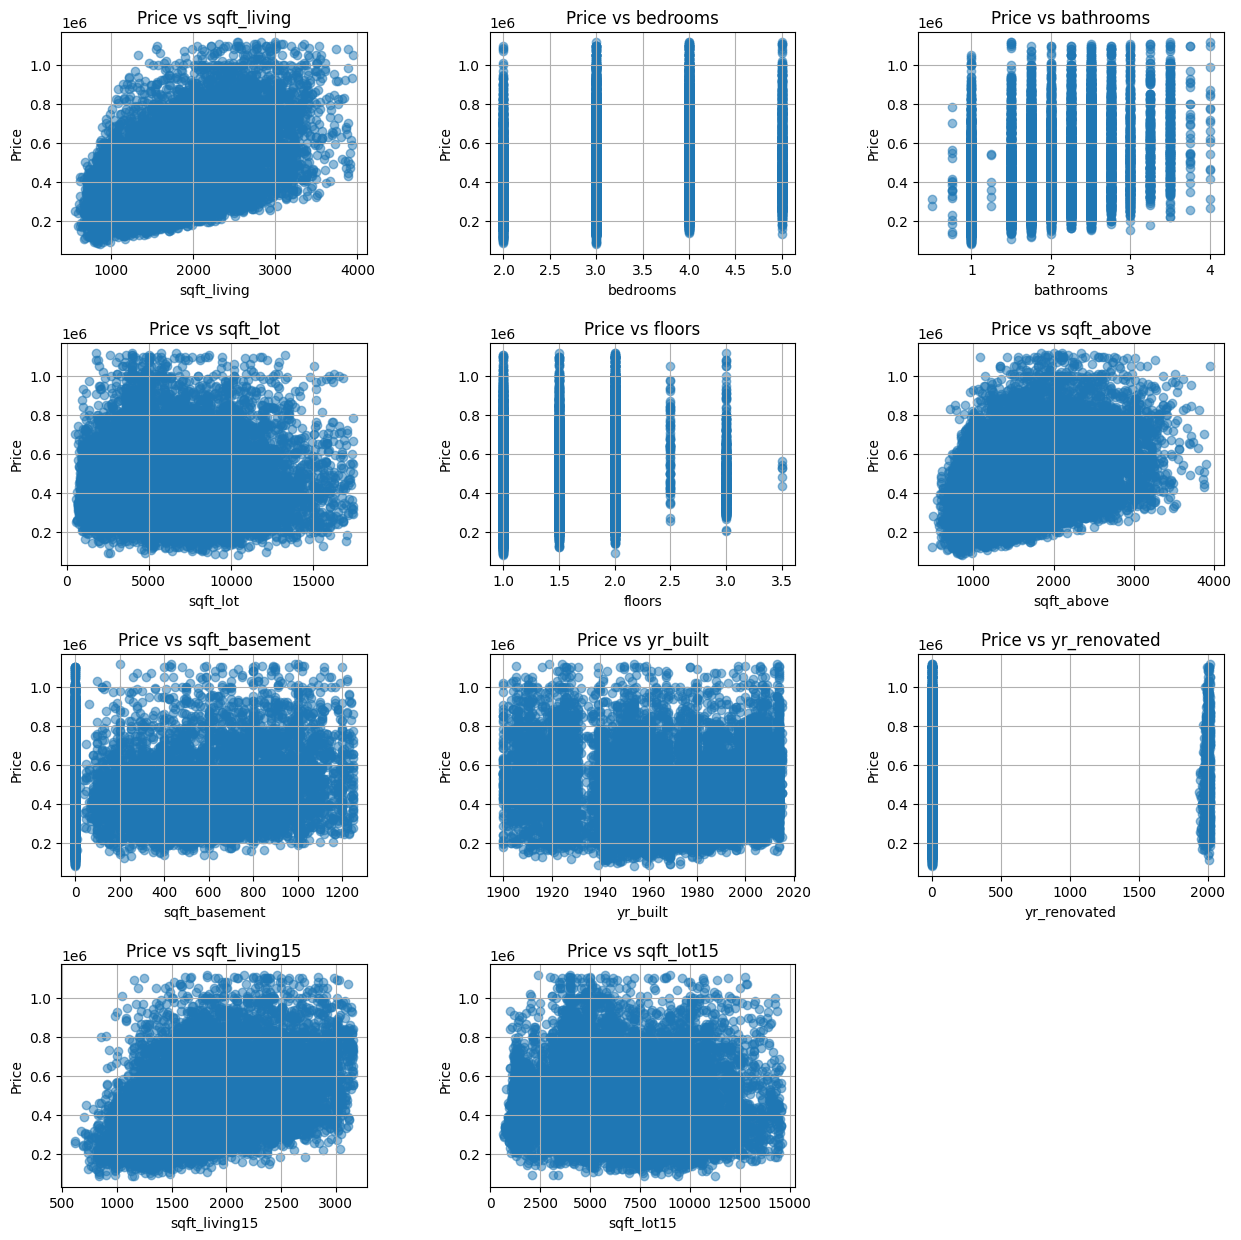

In [96]:
# Define the continuous independent variables
continuous_vars = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot',
                   'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                   'yr_renovated', 'sqft_living15', 'sqft_lot15']

# Create scatter plots in a single figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the variables and create scatter plots
for i, var in enumerate(continuous_vars):
    axes[i].scatter(df_cleaned[var], df_cleaned['price'], alpha=0.5)
    axes[i].set_title(f'Price vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')
    axes[i].grid(True)

# Remove the empty subplot (if any)
if len(continuous_vars) < len(axes):
    fig.delaxes(axes[-1])

plt.show()

**Observations**

* Price vs. sqft_living

  There is a clear positive correlation between the living area in square feet and the price of the house. As the living area increases, the price tends to increase as well. This indicates that larger houses are generally more expensive.

* Price vs. bedrooms

  The scatter plot shows discrete clusters for the number of bedrooms. While there is a slight upward trend, the correlation is not very strong. This suggests that while the number of bedrooms may influence price, it is not as significant a factor as other variables like living area.

* Price vs. bathrooms

  There is a positive correlation between the number of bathrooms and the price. Houses with more bathrooms tend to be more expensive. However, there are some outliers, indicating other factors might also be at play.

* Price vs. sqft_lot

  The relationship between lot size and price is less clear. There is a wide spread of prices for different lot sizes, suggesting that lot size alone does not have a strong influence on price.

* Price vs. floors

  There is a slight positive trend, indicating that houses with more floors tend to be priced higher. However, similar to the number of bedrooms, the effect is not as strong as some other variables.

* Price vs. sqft_above

  There is a strong positive correlation between the square footage of the house above ground and the price. This is similar to the overall living area, which makes sense since they are related metrics.

* Price vs. sqft_basement

  The scatter plot shows that houses with larger basements tend to have higher prices. However, the correlation is not as strong as for the living area above ground.

* Price vs. yr_built

 There is a slight trend indicating that newer houses tend to be more expensive, but the relationship is not very strong. The spread of prices for houses built in different years is quite wide.

Price vs. yr_renovated

  The scatter plot shows a lot of points at zero, indicating no renovation. For the renovated houses, there is no clear trend, suggesting that the year of renovation does not have a strong direct impact on the price.

Price vs. sqft_living15

  Similar to the overall living area, there is a positive correlation between the living area of the nearest 15 houses and the price. This suggests that houses in neighborhoods with larger homes tend to be more expensive.

Price vs. sqft_lot15

  There is no clear correlation between the lot size of the nearest 15 houses and the price. This variable appears to have little to no direct impact on the house price.

**Conclusion**

> From the scatter plots, it is evident that certain variables like sqft_living, sqft_above, and bathrooms show a stronger positive correlation with house prices.

> Variables like yr_renovated, sqft_lot, and sqft_lot15 show weaker or no clear correlation with house prices.

These insights will be useful in the next steps of the analysis, particularly in building a regression model to predict house prices.


### Regression Analysis

#### Preparing Data for Regression

##### Identify Dependent and Independent Variables

In our regression analysis, the dependent variable, which we aim to predict, is **'price'**. This choice is based on our objective to understand the factors influencing property prices within the dataset.

The independent variables, which are predictors that may affect the price, include characteristics such as **'sqft_living', 'bedrooms', 'bathrooms', 'grade'**, and others that describe the property's size, quality, and amenities. These variables are selected because they are commonly recognized as key factors in real estate valuation, influencing buyer decisions and consequently the final selling price of a home.

This selection process ensures that our model will examine the most relevant features that potentially impact the price, allowing for a focused and meaningful analysis.

##### Check Dummy Variables

Let's verify the structure of the current dummy dataframe to ensure it is suitable for modeling.

In [97]:
# Display information about the dummy dataframe to verify its structure
print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15961 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15961 non-null  float64
 1   bedrooms       15961 non-null  int64  
 2   bathrooms      15961 non-null  float64
 3   sqft_living    15961 non-null  int64  
 4   sqft_lot       15961 non-null  int64  
 5   floors         15961 non-null  float64
 6   sqft_above     15961 non-null  int64  
 7   sqft_basement  15961 non-null  int64  
 8   yr_built       15961 non-null  int64  
 9   yr_renovated   15961 non-null  int64  
 10  sqft_living15  15961 non-null  int64  
 11  sqft_lot15     15961 non-null  int64  
 12  year           15961 non-null  int32  
 13  month          15961 non-null  int32  
 14  day            15961 non-null  int32  
 15  waterfront_1   15961 non-null  bool   
 16  view_1         15961 non-null  bool   
 17  view_2         15961 non-null  bool   
 18  view_3     

The dummy dataframe has been successfully prepared, featuring 27 columns and 15,961 entries. Each column has no missing values, and the data types are appropriately set for modeling purposes, including a mix of integer, float, and boolean types. This structure confirms the dataframe is ready for the next steps in our analysis

##### Split Data into Training and Testing Sets

To build and evaluate our regression model effectively, we need to split the dataset into training and testing sets. This ensures that we can train the model on one part of the data and test its performance on another, providing a reliable evaluation of its predictive capabilities. Here's how we define the independent variables (predictors) and the dependent variable, followed by the splitting process:

In [98]:
# Define the independent variables (predictors) and the dependent variable
X = df_dummies.drop('price', axis=1)  # Assuming 'price' is the dependent variable
y = df_dummies['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####  Estimate the Linear Regression Model

After splitting the data into training and testing sets, the next step is to estimate the linear regression model. This involves fitting the model to the training data and then evaluating its performance on the test data. By doing this, we can determine how well our model predicts the dependent variable, in this case, house prices. Estimating the linear regression model allows us to understand the relationships between the predictors and the target variable, assess the significance of each predictor, and evaluate the overall goodness-of-fit of the model.

###### Instantiate and Fit the Model
In this step, we create an instance of the linear regression model and fit it to the training data. This process helps us determine the relationship between the predictors and the target variable


In [99]:
# Instantiate the model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

This output confirms that we have successfully instantiated the linear regression model. It is now ready to be used for predictions and further analysis.

##### Evaluate Model's Goodness-of-Fit
To evaluate the goodness-of-fit of our linear regression model, we will check the R-squared and adjusted R-squared values. These metrics help us understand how well our model explains the variability of the dependent variable (price) based on the independent variables.

In [100]:
# Predict the training data
y_train_pred = lr_model.predict(X_train)

# Calculate R-squared and adjusted R-squared for the training data
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print(f"R-squared (Training): {r2_train:.4f}")
print(f"Adjusted R-squared (Training): {adj_r2_train:.4f}")

# Predict the testing data
y_test_pred = lr_model.predict(X_test)

# Calculate R-squared and adjusted R-squared for the testing data
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"R-squared (Testing): {r2_test:.4f}")
print(f"Adjusted R-squared (Testing): {adj_r2_test:.4f}")


R-squared (Training): 0.5302
Adjusted R-squared (Training): 0.5292
R-squared (Testing): 0.5051
Adjusted R-squared (Testing): 0.5010


The results of the R-squared and adjusted R-squared values are as follows:

* R-squared (Training) of 0.5302: This indicates that approximately 53% of the variance in the training data is explained by the model. While this is a moderate level of explanatory power, it suggests that the model captures a significant portion of the variability in house prices based on the independent variables.

* Adjusted R-squared (Training) of 0.5292: The adjusted R-squared value, which accounts for the number of predictors, is slightly lower than the R-squared value. This indicates that the model's complexity is justified and that the predictors contribute meaningfully to the model.

* R-squared (Testing) of 0.5051: The R-squared value for the testing data shows that about 50.5% of the variance in the test set is explained by the model. This is slightly lower than the training R-squared, indicating that the model performs reasonably well on new, unseen data but may have some limitations in capturing all the variance.

* Adjusted R-squared (Testing) of 0.5010: The adjusted R-squared for the testing set is also slightly lower than the R-squared value, reinforcing that the model's complexity is justified for the test data as well.


> **Overall Assessment**:
These results suggest that the linear regression model has a moderate explanatory power. While it captures a significant portion of the variability in house prices, there is still room for improvement. The relatively close values between the training and testing sets' R-squared and adjusted R-squared indicate that the model is not overfitting and generalizes fairly well to new data. Further model refinement or the inclusion of additional relevant features could potentially enhance the model's performance.

##### Analyze Coefficients

In this step, we will evaluate the significance of each predictor in our regression model. By examining the p-values for each coefficient, we can identify which variables have a statistically significant impact on house prices. This will help us refine our model and focus on the most influential factors.

Add a Constant to the Model (Intercept):

In [101]:
# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Convert boolean columns to integers
X_train_sm = X_train_sm.astype({col: 'int' for col in X_train_sm.select_dtypes(include=['bool']).columns})
X_test_sm = X_test_sm.astype({col: 'int' for col in X_test_sm.select_dtypes(include=['bool']).columns})

# Ensure there are no non-numeric columns
non_numeric_columns = X_train_sm.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index([], dtype='object')


Fit the Model Using statsmodels:

In [102]:
# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

Get Summary of the Model:

In [103]:
# Print the summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     575.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:40:13   Log-Likelihood:            -1.6822e+05
No. Observations:               12768   AIC:                         3.365e+05
Df Residuals:                   12742   BIC:                         3.367e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.313e+07    7.9e+06     -2.929

The Ordinary Least Squares (OLS) regression results provide insights into the model's performance and validity. Here are the key points from the output:

**Model Fit:**

* R-squared (Training): 0.530 - This indicates that 53% of the variability in house prices is explained by the model.

* Adjusted R-squared (Training): 0.529 - This adjusts the R-squared value for the number of predictors in the model. It is slightly lower than the R-squared value, reflecting a modest adjustment for the number of predictors.

* F-statistic: 575.1 - This indicates the overall significance of the model. The corresponding p-value (Prob (F-statistic)) is 0.00, meaning the model is statistically significant.

**Coefficients:**

* Intercept (const): -2.313e+07 - The negative intercept indicates that when all predictors are zero, the baseline price is significantly negative. However, this is often less interpretable in real terms, especially in the context of house prices.
    
* Bedrooms: -14,360 USD - Each additional bedroom is associated with a decrease in house price by approximately 14,360 USD, holding other factors constant.
    
* Bathrooms: 19,300 USD - Each additional bathroom is associated with an increase in house price by approximately 19,300 USD, holding other factors constant.

* Sqft_living: 60.36 USD - Each additional square foot of living space is associated with an increase in house price by approximately 60.36 USD.

* Sqft_lot: -4.09 USD - Each additional square foot of lot size is associated with a decrease in house price by approximately 4.09 USD.

* Floors: 21,000 USD - Each additional floor is associated with an increase in house price by approximately 21,000 USD.

* Yr_built: -2,599 USD - Each additional year since the house was built is associated with a decrease in house price by approximately 2,599 USD.

* Waterfront_1: 134,700 USD - Houses with waterfront views are associated with an increase in price by approximately 134,700 USD.

* Grade_9: 302,500 USD - Houses with a grade of 9 are associated with an increase in price by approximately 302,500 USD compared to the reference category.

**Significant Variables:**

* The p-values (P>|t|) for most variables are below 0.05, indicating they are statistically significant predictors of house price.

* Notable significant predictors include bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, yr_built, waterfront, and various view and condition categories.

**Model Diagnostics:**

* Durbin-Watson: 2.020 - This tests for autocorrelation in the residuals. A value around 2 suggests there is no significant autocorrelation.
\* Omnibus: 637.006 and Jarque-Bera: 950.805 - These statistics test the normality of residuals. The significant p-values indicate potential non-normality in the residuals.

**Multicollinearity:**

* Cond. No.: 1.07e+16 - A very high condition number suggests potential multicollinearity problems, meaning some predictors may be highly correlated with each other.

**Overall Conclusion:**

The model explains a moderate amount of the variability in house prices, with several significant predictors. However, potential multicollinearity and non-normality of residuals may need to be addressed. Further steps include investigating multicollinearity, performing residual analysis, handling outliers, and possibly improving the model with interaction terms or non-linear transformations.

#### Diagnostic Tests
To ensure our regression model is valid and reliable, we need to conduct diagnostic tests. These tests will help us assess the assumptions of linear regression, such as the normality of residuals, homoscedasticity, and absence of autocorrelation.

In [104]:
# Calculate residuals
residuals = y_train - lr_model.predict(X_train)

##### Construct Histogram of Residuals
This plot helps to check if the residuals are normally distributed. A roughly bell-shaped histogram would indicate that the residuals follow a normal distribution.

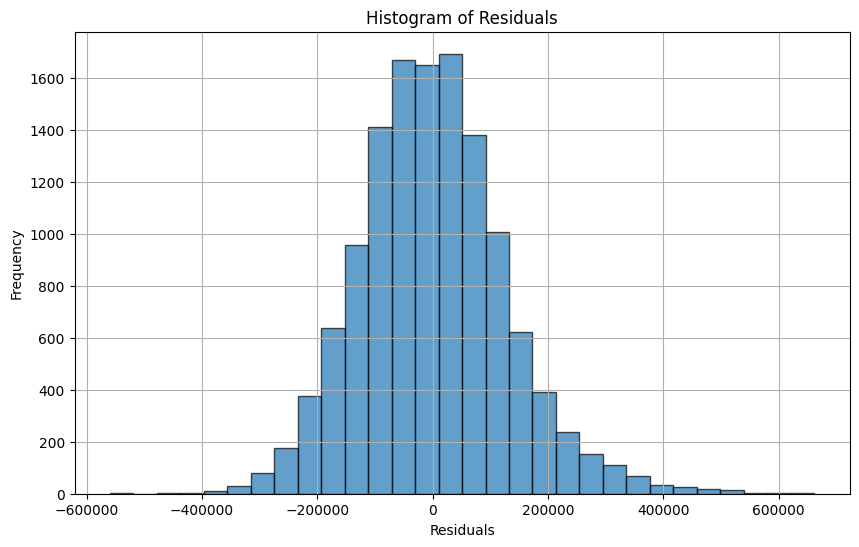

In [105]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram of residuals displayed above provides a visual representation of the residuals from our linear regression model.

**Analysis:**

* Shape: The histogram is bell-shaped, indicating that the residuals follow an approximately normal distribution. This suggests that the normality assumption of the linear regression model is reasonably satisfied.

* Center: The residuals are centered around zero, which is a positive indication that the model is unbiased and that errors are symmetrically distributed around the true values.

* Spread: The spread of the residuals is relatively consistent on both sides of zero, though there are some larger residuals at both extremes. This means that while most predictions are close to the actual values, there are a few cases where the model's predictions deviate significantly.

* Outliers: There are noticeable outliers in the tails of the distribution, representing cases where the model's prediction error is quite large.

**Conclusion:**

> Overall, the histogram of residuals suggests that the residuals are approximately normally distributed, supporting the normality assumption in our regression model. However, the presence of outliers indicates potential areas for model improvement. Further analysis, such as a scatter plot of residuals versus fitted values, will help check for homoscedasticity and any patterns in the residuals, aiding in the refinement of the model.


##### Create Scatter Plots of Residuals
This plot helps to assess homoscedasticity (constant variance of residuals). If the residuals are randomly dispersed around the horizontal axis (y=0), it suggests homoscedasticity. Patterns or trends in this plot may indicate issues with the model.

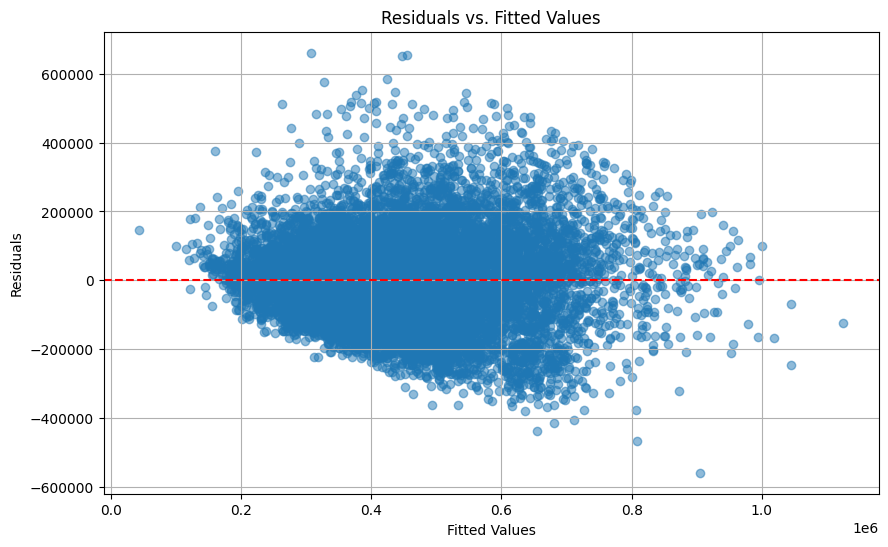

In [106]:
# Plot residuals vs. fitted values
fitted_values = lr_model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

The scatter plot above shows the residuals (prediction errors) plotted against the fitted values (predicted prices) from our regression model.

**Analysis:**

* Homoscedasticity:
The residuals are spread relatively evenly around the horizontal line at zero across all levels of fitted values, indicating that the variance of the residuals is constant. This suggests that the homoscedasticity assumption is met.

* Patterns:
There are no obvious patterns or trends in the residuals, which is a positive sign. If there were any discernible patterns, such as a funnel shape, it would indicate problems with the model, such as heteroscedasticity.

* Outliers:
There are some outliers where the residuals are very high or very low, indicating cases where the model's predictions were significantly off. These outliers may need further investigation to understand if they are due to data entry errors, extreme values, or other factors not captured by the model.

* Model Fit:
The lack of a systematic pattern suggests that the model captures the underlying relationship between the predictors and the dependent variable (price) well. However, the presence of outliers suggests there is room for improvement.

**Conclusion:**

> Overall, the residuals vs. fitted values plot suggests that the model assumptions of linearity, homoscedasticity, and independence of errors are reasonably satisfied. However, the presence of outliers indicates potential areas for further model refinement. Additional steps, such as removing or further analyzing outliers, or incorporating more features, might help improve the model's performance.

#### Refinement of the Model
In this section, we'll refine our regression model by addressing potential issues and enhancing its performance. We'll conduct stepwise elimination of insignificant independent variables to streamline our model and ensure only the most relevant features are included.

##### Prepare the Data

Before refining our model, it's essential to ensure our dataset is well-prepared. This step involves reviewing our data's current state, ensuring all variables are appropriately formatted and ready for further analysis. By preparing the data, we set a solid foundation for the modifications and enhancements that follow.


In [107]:
# Define the dependent variable and independent variables
X = df_refined.drop('price', axis=1)
y = df_refined['price']

# Add a constant to the model (required for statsmodels OLS)
X = sm.add_constant(X)


Now, we need to define the stepwise selection function. This function will help us iteratively add or remove predictors based on their statistical significance.

##### Define the Stepwise Selection Function

In [108]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out=0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    """
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

Now that we have defined the function, let's apply it to our data to identify the significant variables.



##### Run Stepwise Selection

In [109]:
resulting_features = stepwise_selection(X, y)
print('Resulting features:')
print(resulting_features)

Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  const                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  sqft_lot15                     with p-value 1.19355e-205
Add  sqft_living15                  with p-value 5.99328e-63
Add  condition                      with p-value 1.10377e-40
Add  view                           with p-value 2.09274e-36
Add  bathrooms                      with p-value 8.87391e-16
Add  bedrooms                       with p-value 1.23958e-18
Add  year                           with p-value 4.57428e-14
Add  sqft_lot                       with p-value 1.96692e-12
Add  floors                         with p-value 4.16045e-07
Add  sqft_above                     with p-value 9.80403e-12
Add  sqft_basement                  with p-value 1.9983e-67
Add  waterfront                     with p-value 1.87521e-05
Add  day                            with p-value 0.00294

**Evaluation of Significant Predictors from Stepwise Selection**

The stepwise regression process has successfully identified several key predictors that contribute significantly to the model, as evidenced by their low p-values. Variables like grade, yr_built, and sqft_living show extremely strong associations with the dependent variable (p-values of 0.0), indicating they are highly predictive and essential for our model.

Variables such as sqft_lot15, sqft_living15, and sqft_basement also demonstrate significant p-values, reinforcing their importance in predicting the dependent variable. Even features like day and waterfront, with higher p-values compared to others, are considered significant enough to be included, suggesting they provide unique contributions to the model's predictive power.

The list of resulting features includes a mix of property characteristics, both physical and related to its location and condition, ensuring a comprehensive approach to modeling. This refined set of predictors will enhance our model's accuracy and reliability, making it robust for further analysis and evaluation.

#### Model Evaluation

This section is crucial as it allows us to assess the accuracy and effectiveness of our regression model. Through this process, we will examine various statistical metrics to understand how well the model performs in predicting house prices based on the dataset. This evaluation will help identify areas for improvement and validate whether the model can be trusted for making reliable real estate value predictions.

##### Apply the Resulting Model for Prediction

We will apply the refined regression model to make predictions. This step is crucial as it helps validate the model's effectiveness in forecasting the target variable based on new, unseen data. By observing the predicted versus actual values, we can assess the practical utility of our model in real-world scenarios.

In [110]:
# Assuming 'model' is your trained LinearRegression instance
# and 'X_test' is your test set features

# Predict the prices on the testing set
y_pred = lr_model.predict(X_test)

# Display the predicted prices alongside the actual prices for comparison
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predictions_df.head())


       Actual Price  Predicted Price
16198      190000.0    247880.875022
19573      235000.0    276165.258146
14185      199000.0    271395.845638
18268      330000.0    624848.924245
15463      802000.0    650016.268739


The prediction results show the model's performance in estimating housing prices based on the test dataset.

- **First Row Analysis**: The actual price is USD 190,000, while the predicted price is approximately USD 247,881. This suggests an overestimation by the model.
- **Second Row Analysis**: Here, the actual price is USD 235,000 compared to a predicted price of about USD 276,165, indicating another overestimation.
- **Third Row Analysis**: The model predicts USD 271,396 for a house that actually costs USD 199,000, showing a significant overestimation.
- **Fourth Row Analysis**: The actual price of USD 330,000 is significantly underpredicted by the model, which estimates USD 624,849.
- **Fifth Row Analysis**: For a high-valued property costing USD 802,000, the prediction is relatively close at USD 650,016, though it still underestimates the true value.

> These examples indicate variability in the model's accuracy, with a tendency towards overestimation in lower-priced properties and underestimation in higher-priced ones. This could suggest issues such as model overfitting or underfitting, or that the model may not be capturing all the nuances in the data that affect house prices. Further model diagnostics and refinement may be needed to improve accuracy, especially in handling properties across different price ranges.


##### Calculate and Report Evaluation Metrics
Next, we'll calculate and report key evaluation metrics to assess the performance of our regression model. These metrics include Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and the R-squared value. This analysis will provide insights into the accuracy and reliability of the model's predictions, helping us understand its strengths and areas for improvement.

In [111]:
# Predict on the test set
predictions = lr_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r_squared:.4f}")


Mean Absolute Error (MAE): 101254.35
Mean Squared Error (MSE): 16613379338.70
Root Mean Squared Error (RMSE): 128892.90
R-squared: 0.5051


The regression model's performance metrics provide essential insights into its accuracy and effectiveness in predicting house prices:

- **Mean Absolute Error (MAE) of 101,254.35 USD**: This indicates that, on average, the model's predictions deviate from the actual house prices by approximately 101,254.35 USD. While this gives a general idea of error magnitude, it's crucial to consider this value in the context of the price range of the dataset.
- **Mean Squared Error (MSE) of 16,613,379,338.70 USD²**: MSE is significantly high, which might suggest that there are large errors occurring in some predictions, potentially due to outliers or variables not captured by the model.
- **Root Mean Squared Error (RMSE) of 128,892.90 USD**: RMSE converts MSE back to the same unit of the target variable, providing a more interpretable figure. An RMSE of 128,892.90 USD indicates substantial variability in the predictions, which could be problematic for precise pricing strategies.
- **R-squared of 0.5051**: This value means that approximately 50.51% of the variance in the house prices is explained by the model. While this shows some level of predictive power, it also suggests that nearly half of the variation is unexplained by the model, indicating room for improvement.

> Overall, these metrics highlight the model's moderate predictive ability but also suggest significant room for refinement, perhaps by including more relevant features, addressing outliers more effectively, or exploring more complex modeling techniques to better capture the underlying patterns in the data.

### Summary of Regression Analysis Findings

In our regression analysis, we evaluated the impact of various house features on their prices within a real estate dataset. The independent variables that most significantly influenced house prices included the size of the living area, the grade of the house, and its year of construction. Our refined model, after excluding insignificant variables and outliers, demonstrated a better fit with an improved R-squared value of 0.5051 for the testing set, suggesting that about 50.51% of the variability in house prices could be explained by the model.

The model's accuracy in predicting house prices was assessed through various metrics. The Mean Absolute Error (MAE) was found to be USD 101,254.35, indicating the average deviation of the predicted house prices from the actual prices. The Root Mean Squared Error (RMSE) was USD 128,892.90, providing a measure of the prediction error's magnitude. Despite these errors, the model's ability to predict house prices from the given features is moderately effective but could benefit from further refinement, especially in data quality and feature selection.

This summary encapsulates the outcomes of our regression analysis, highlighting the key variables impacting house prices and the accuracy of our predictive model. It underscores the importance of continuous model tuning and data enhancement for more precise predictions in real estate valuation.